In [4]:
import numpy as np
import pandas as pd 
import keras
from scipy.special import expit 
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from keras.layers import Dense, Input
from keras.models import Model, Sequential
from keras.utils import to_categorical
from causalgraphicalmodels import CausalGraphicalModel

import dowhy
from dowhy import CausalModel
# import dowhy.datasets

In [12]:
df = pd.read_csv('./AMLWorkshop-master/Data/features.csv')
df

,datetime,machineID,voltmean,rotatemean,pressuremean,vibrationmean,voltsd,rotatesd,pressuresd,vibrationsd,error1count,error2count,error3count,error4count,error5count,model,age,failure
0,2015-01-02T05:00:00Z,1,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,0.0,0.0,0.0,0.0,0.0,model3,18,False
1,2015-01-02T08:00:00Z,1,170.525721,443.906847,97.667249,39.786670,12.591948,46.930282,9.406795,6.098173,0.0,0.0,0.0,0.0,0.0,model3,18,False
2,2015-01-02T11:00:00Z,1,170.049722,446.461279,96.906162,40.016513,13.277336,42.836780,9.071472,5.481724,0.0,0.0,0.0,0.0,0.0,model3,18,False
3,2015-01-02T14:00:00Z,1,170.341974,447.355315,96.229522,39.921963,13.817158,42.808633,8.256794,5.862312,0.0,0.0,0.0,0.0,0.0,model3,18,False
4,2015-01-02T17:00:00Z,1,170.060643,452.163407,96.357441,39.990470,14.792869,42.525293,8.669605,5.907157,0.0,0.0,0.0,0.0,0.0,model3,18,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291295,2015-12-31T17:00:00Z,100,170.629076,460.274876,101.745117,39.822650,15.540254,61.990806,7.471675,5.269368,0.0,0.0,0.0,0.0,0.0,model4,5,False
291296,2015-12-31T20:00:00Z,100,168.690712,452.543468,101.267368,38.398832,17.138346,63.314126,9.050840,5.937929,0.0,0.0,0.0,0.0,0.0,model4,5,False
291297,2015-12-31T23:00:00Z,100,168.469994,463.241909,101.846119,38.826901,17.310060,67.148361,9.567172,5.670301,0.0,0.0,0.0,0.0,0.0,model4,5,False
291298,2016-01-01T02:00:00Z,100,170.619827,462.234803,101.414987,39.955780,16.403499,65.897332,8.830133,6.146110,0.0,0.0,0.0,0.0,0.0,model4,5,False


In [21]:
# Without graph                                       
model= CausalModel(                             
        data=df,                                      
        treatment=["age"],             
        outcome=["failure"],          
        instruments=["voltmean"],       
        common_causes=["pressuremean", "vibrationmean"])
# effect_modifiers=data["effect_modifier_names"])

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['age'] on outcome ['failure']


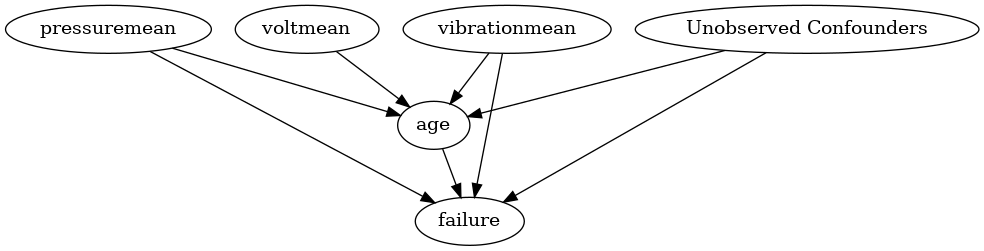

In [22]:

model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))